In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
import warnings
import os

In [2]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_encoded=pd.read_csv('/content/drive/My Drive/encoded_data/df_encoded.csv')

In [5]:
y=df_encoded['Approved_Flag']
x=df_encoded.drop(['Approved_Flag'],axis=1)

In [12]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age_Newest_TL                 42064 non-null  int64  
 1   pct_PL_enq_L6m_of_ever        42064 non-null  float64
 2   CC_TL                         42064 non-null  int64  
 3   Age_Oldest_TL                 42064 non-null  int64  
 4   GL_Flag                       42064 non-null  int64  
 5   Home_TL                       42064 non-null  int64  
 6   EDUCATION                     42064 non-null  int64  
 7   PL_TL                         42064 non-null  int64  
 8   time_since_recent_payment     42064 non-null  int64  
 9   recent_level_of_deliq         42064 non-null  int64  
 10  num_sub                       42064 non-null  int64  
 11  Secured_TL                    42064 non-null  int64  
 12  pct_CC_enq_L6m_of_ever        42064 non-null  float64
 13  n

In [6]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

In [8]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 54 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age_Newest_TL                 42064 non-null  int64  
 1   pct_PL_enq_L6m_of_ever        42064 non-null  float64
 2   CC_TL                         42064 non-null  int64  
 3   Age_Oldest_TL                 42064 non-null  int64  
 4   GL_Flag                       42064 non-null  int64  
 5   Home_TL                       42064 non-null  int64  
 6   EDUCATION                     42064 non-null  int64  
 7   PL_TL                         42064 non-null  int64  
 8   time_since_recent_payment     42064 non-null  int64  
 9   recent_level_of_deliq         42064 non-null  int64  
 10  num_sub                       42064 non-null  int64  
 11  Secured_TL                    42064 non-null  int64  
 12  pct_CC_enq_L6m_of_ever        42064 non-null  float64
 13  n

In [9]:
y.value_counts()

,count
Approved_Flag,
P2,25452
P3,6440
P4,5264
P1,4908


In [ ]:
##Logistic reg fit

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [16]:
#evaluate
from sklearn.metrics import classification_report, accuracy_score

y_pred = lr_model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.7497919885890884
              precision    recall  f1-score   support

          P1       0.84      0.71      0.77      1014
          P2       0.77      0.94      0.85      5045
          P3       0.42      0.10      0.17      1325
          P4       0.67      0.69      0.68      1029

    accuracy                           0.75      8413
   macro avg       0.67      0.61      0.61      8413
weighted avg       0.71      0.75      0.71      8413



In [17]:
# Coefficients and Odds Ratios
coefficients = lr_model.coef_[0]
odds_ratios = np.exp(coefficients)


# Display feature importance using coefficients and odds ratios
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})
print("\nFeature Importance (Coefficient and Odds Ratio):")
print(feature_importance.sort_values(by='Coefficient', ascending=False))


Feature Importance (Coefficient and Odds Ratio):
                         Feature  Coefficient  Odds Ratio
3                  Age_Oldest_TL     2.467843   11.796973
37                 num_std_12mts     1.640024    5.155294
33         time_since_recent_enq     0.657700    1.930348
14                       num_dbt     0.141176    1.151627
29                   PL_enq_L12m     0.137314    1.147189
10                       num_sub     0.076969    1.080009
20               pct_tl_open_L6M     0.071796    1.074436
8      time_since_recent_payment     0.070129    1.072646
27                       CC_Flag     0.070095    1.072610
12        pct_CC_enq_L6m_of_ever     0.068864    1.071290
5                        Home_TL     0.047164    1.048294
15             pct_tl_closed_L6M     0.046732    1.047841
21            Tot_TL_closed_L12M     0.044581    1.045590
26                  num_sub_6mts     0.041410    1.042279
53        first_prod_enq2_others     0.038122    1.038858
46             last_pr

In [19]:
# Permutation Importance
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFE
perm_importance = permutation_importance(lr_model, X_test_scaled, y_test, n_repeats=30, random_state=42, n_jobs=-1)
perm_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance Mean': perm_importance.importances_mean,
    'Importance Std': perm_importance.importances_std
})
print("\nPermutation Importance:")
print(perm_importance_df.sort_values(by='Importance Mean', ascending=False))


Permutation Importance:
                         Feature  Importance Mean  Importance Std
17                       enq_L3m     1.371647e-01        0.003909
3                  Age_Oldest_TL     1.233726e-01        0.003052
37                 num_std_12mts     5.040612e-02        0.002074
1         pct_PL_enq_L6m_of_ever     2.216411e-02        0.001917
0                  Age_Newest_TL     1.622489e-02        0.001564
33         time_since_recent_enq     1.403780e-02        0.001766
9          recent_level_of_deliq     4.615872e-03        0.001079
36             num_deliq_6_12mts     2.361425e-03        0.000774
19             num_times_60p_dpd     1.608622e-03        0.000653
20               pct_tl_open_L6M     1.129205e-03        0.001020
8      time_since_recent_payment     9.627957e-04        0.000541
34     max_recent_level_of_deliq     9.310987e-04        0.000636
2                          CC_TL     8.161972e-04        0.000370
52            first_prod_enq2_PL     7.607274e-04  

In [20]:
lr_model_w = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    class_weight='balanced',  # Automatically adjusts for class imbalance
    max_iter=1000,
    random_state=42
)
lr_model_w.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=1000,
                   multi_class='multinomial', random_state=42)

In [21]:
#evaluate
from sklearn.metrics import classification_report, accuracy_score

y_pred_w = lr_model_w.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred_w))
print(classification_report(y_test, y_pred_w, target_names=label_encoder.classes_))

Accuracy: 0.6777606085819565
              precision    recall  f1-score   support

          P1       0.65      0.90      0.75      1014
          P2       0.89      0.67      0.77      5045
          P3       0.33      0.49      0.40      1325
          P4       0.61      0.72      0.66      1029

    accuracy                           0.68      8413
   macro avg       0.62      0.70      0.64      8413
weighted avg       0.74      0.68      0.69      8413



In [22]:
custom_weights = {0: 1.5, 1: 0.8, 2: 2.0, 3: 1.2}  # Try increasing weight for P3 (label 2)
lr_custom = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight=custom_weights, max_iter=1000)

In [23]:
#evaluate
from sklearn.metrics import classification_report, accuracy_score
lr_custom.fit(X_train_scaled, y_train)
y_pred_custom = lr_custom.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom, target_names=label_encoder.classes_))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.7367169856174968
              precision    recall  f1-score   support

          P1       0.78      0.78      0.78      1014
          P2       0.83      0.83      0.83      5045
          P3       0.39      0.49      0.43      1325
          P4       0.78      0.57      0.66      1029

    accuracy                           0.74      8413
   macro avg       0.70      0.67      0.68      8413
weighted avg       0.75      0.74      0.74      8413



In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Store different weight combinations to test
weight_options = [
    {0: 1, 1: 1, 2: 1, 3: 1},               # baseline (no weighting)
    {0: 1.5, 1: 0.7, 2: 2.5, 3: 1.5},       # trial 1
    {0: 1.2, 1: 0.9, 2: 3.0, 3: 1.8},       # trial 2 (boost P3/P4 more)
    {0: 1.0, 1: 1.0, 2: 2.0, 3: 2.0},       # trial 3 (balanced emphasis)
    {0: 1.3, 1: 0.8, 2: 2.8, 3: 1.6},       # trial 4
]

In [25]:
from sklearn.model_selection import train_test_split

for i, weights in enumerate(weight_options):
    print(f"\n🔎 Trial {i + 1} with weights: {weights}")
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000, class_weight=weights)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


🔎 Trial 1 with weights: {0: 1, 1: 1, 2: 1, 3: 1}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.7497919885890884
              precision    recall  f1-score   support

          P1       0.84      0.71      0.77      1014
          P2       0.77      0.94      0.85      5045
          P3       0.42      0.10      0.17      1325
          P4       0.67      0.69      0.68      1029

    accuracy                           0.75      8413
   macro avg       0.67      0.61      0.61      8413
weighted avg       0.71      0.75      0.71      8413


🔎 Trial 2 with weights: {0: 1.5, 1: 0.7, 2: 2.5, 3: 1.5}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.7098537976940449
              precision    recall  f1-score   support

          P1       0.76      0.79      0.78      1014
          P2       0.86      0.75      0.80      5045
          P3       0.36      0.60      0.45      1325
          P4       0.78      0.57      0.66      1029

    accuracy                           0.71      8413
   macro avg       0.69      0.68      0.67      8413
weighted avg       0.76      0.71      0.73      8413


🔎 Trial 3 with weights: {0: 1.2, 1: 0.9, 2: 3.0, 3: 1.8}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.7207892547248306
              precision    recall  f1-score   support

          P1       0.83      0.72      0.77      1014
          P2       0.84      0.79      0.82      5045
          P3       0.37      0.58      0.45      1325
          P4       0.78      0.57      0.66      1029

    accuracy                           0.72      8413
   macro avg       0.70      0.66      0.67      8413
weighted avg       0.76      0.72      0.73      8413


🔎 Trial 4 with weights: {0: 1.0, 1: 1.0, 2: 2.0, 3: 2.0}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.7432544871032926
              precision    recall  f1-score   support

          P1       0.85      0.69      0.76      1014
          P2       0.81      0.88      0.84      5045
          P3       0.40      0.30      0.34      1325
          P4       0.66      0.69      0.67      1029

    accuracy                           0.74      8413
   macro avg       0.68      0.64      0.65      8413
weighted avg       0.73      0.74      0.73      8413


🔎 Trial 5 with weights: {0: 1.3, 1: 0.8, 2: 2.8, 3: 1.6}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.7150837988826816
              precision    recall  f1-score   support

          P1       0.80      0.76      0.78      1014
          P2       0.85      0.77      0.81      5045
          P3       0.37      0.60      0.45      1325
          P4       0.79      0.55      0.65      1029

    accuracy                           0.72      8413
   macro avg       0.70      0.67      0.67      8413
weighted avg       0.76      0.72      0.73      8413



custom_weights = {0: 1.5, 1: 0.8, 2: 2.0, 3: 1.2}  # Try increasing weight for P3 (label 2)

In [26]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Adjust degree for interactions; try 2 first
poly_logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(
        max_iter=1000,
        solver='saga',          # supports L1
        penalty='l1',           # L1 for feature selection
        class_weight={0: 1.5, 1: 0.8, 2: 2.0, 3: 1.2},  # best weight trial
        multi_class='multinomial',
        random_state=42
    ))
])

In [ ]:
poly_logreg_pipeline.fit(X_train, y_train)
y_pred = poly_logreg_pipeline.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7368358492808749
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1014
           1       0.83      0.83      0.83      5045
           2       0.39      0.49      0.43      1325
           3       0.78      0.57      0.66      1029

    accuracy                           0.74      8413
   macro avg       0.70      0.67      0.68      8413
weighted avg       0.75      0.74      0.74      8413



In [ ]:
from sklearn.model_selection import cross_val_score

# 5-Fold Cross Validation
cv_scores = cross_val_score(
    poly_logreg_pipeline, x, y_encoded,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())


Cross-Validation Accuracy Scores: [0.7281588  0.74111494 0.73124926 0.7320813  0.7350214 ]
Mean Accuracy: 0.7335251401734935
Standard Deviation: 0.004379629294202026


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd
import itertools
from tqdm import tqdm

# Define parameter grid
param_dist = {
    'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
    'learning_rate': [1, 0.1, 0.01, 0.001],
    'max_depth': [3, 5, 8, 10],
    'reg_alpha': [1, 10, 100],
    'n_estimators': [10, 50, 100]
}

# Generate all combinations
keys, values = zip(*param_dist.items())
param_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

# Split dataset (you must define X and y before this)
X_train, X_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42, stratify=y)

results = []

# Loop over combinations
for params in tqdm(param_combinations, desc="Running Grid Search"):
    model = XGBClassifier(
        objective='multi:softmax',
        num_class=4,
        eval_metric='mlogloss',
        use_label_encoder=False,
        random_state=42,
        **params
    )
    model.fit(X_train, y_train)

    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    test_acc = accuracy_score(y_test, y_pred_test)
    train_acc = accuracy_score(y_train, y_pred_train)
    f1 = f1_score(y_test, y_pred_test, average='weighted')

    results.append({
        **params,
        'train_accuracy': train_acc,
        'test_accuracy': test_acc,
        'f1_score': f1
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Optional: save to CSV
results_df.to_csv("xgboost_grid_search_results.csv", index=False)

# Show top 5 combinations
print(results_df.sort_values(by='f1_score', ascending=False).head())

Running Grid Search:   0%|          | 0/720 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:30:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
Running Grid Search:   0%|          | 1/720 [00:01<23:11,  1.93s/it]/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:30:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
Running Grid Search:   0%|          | 2/720 [00:07<50:58,  4.26s/it]/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:30:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
Running Grid Search:   0%|          | 3/720 [00:09<39:15,  3.29s/it]/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:30:58] WARNING: /works

     colsample_bytree  learning_rate  max_depth  reg_alpha  n_estimators  \
353               0.5            0.1         10          1           100   
644               0.9            0.1         10         10           100   
580               0.9            1.0          3         10            50   
581               0.9            1.0          3         10           100   
585               0.9            1.0          5          1            10   

     train_accuracy  test_accuracy  f1_score  
353        0.928888       0.778795  0.764546  
644        0.845829       0.778082  0.764253  
580        0.800184       0.779389  0.764179  
581        0.813408       0.778200  0.763938  
585        0.803572       0.776536  0.763863  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
results_df.to_csv('/content/drive/MyDrive/xgboost_grid_search_results.csv', index=False)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# Choose one of the good ones, e.g., index 580
best_params = {
    'colsample_bytree': 0.9,
    'learning_rate': 1.0,
    'max_depth': 3,
    'reg_alpha': 10,
    'n_estimators': 50,
    'objective': 'multi:softprob',
    'num_class': 4,
    'eval_metric': 'mlogloss',
    'use_label_encoder': False,
    'random_state': 42
}

xgb_best = XGBClassifier(**best_params)
xgb_best.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:21:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=1.0, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_class=4, num_parallel_tree=None, ...)

In [ ]:
y_probs = xgb_best.predict_proba(X_test)
y_preds = y_probs.argmax(axis=1)

print(classification_report(y_test, y_preds))
print(confusion_matrix(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       982
           1       0.82      0.92      0.87      5090
           2       0.43      0.28      0.34      1288
           3       0.77      0.70      0.74      1053

    accuracy                           0.78      8413
   macro avg       0.72      0.67      0.69      8413
weighted avg       0.76      0.78      0.76      8413

[[ 751  231    0    0]
 [ 106 4701  252   31]
 [  34  701  363  190]
 [   3   85  223  742]]


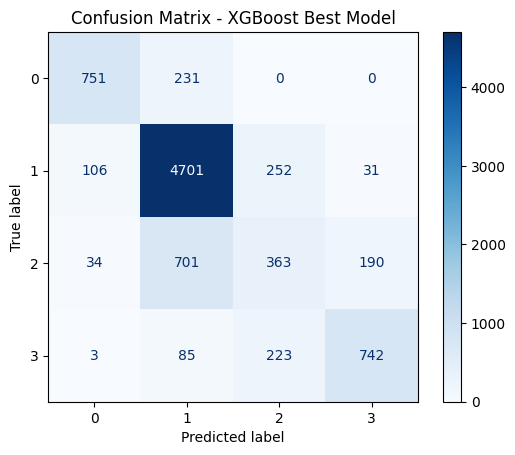

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_preds, cmap="Blues")
plt.title("Confusion Matrix - XGBoost Best Model")
plt.show()

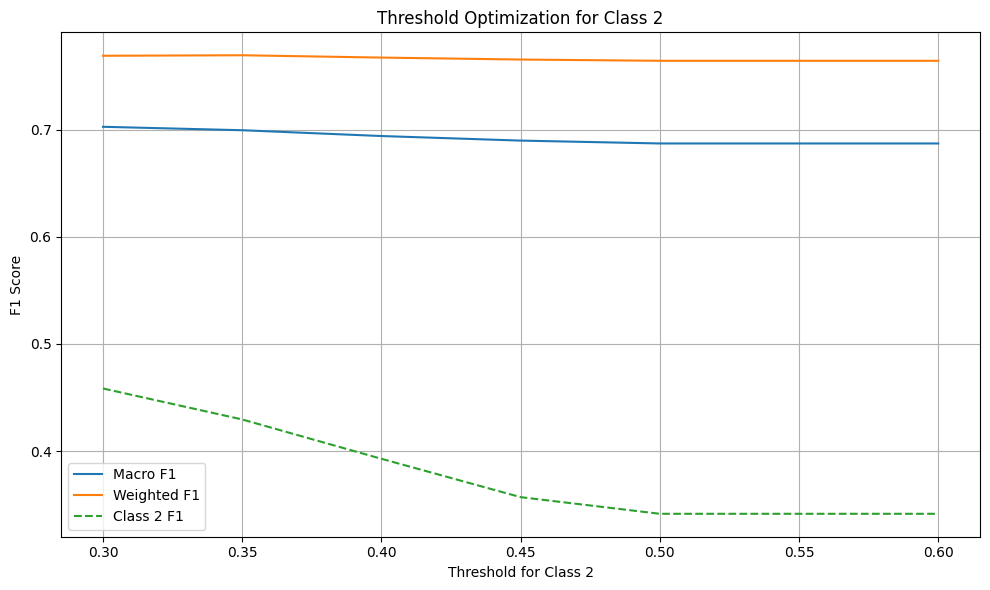

   threshold  macro_f1  weighted_f1  class2_f1
0       0.30  0.702591     0.768865   0.458405
1       0.35  0.699383     0.769335   0.429499
2       0.40  0.693969     0.767171   0.392797
3       0.45  0.689710     0.765346   0.357013
4       0.50  0.687037     0.764179   0.341486


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Define threshold evaluation function
def evaluate_class2_thresholds(y_probs, y_true, thresholds=np.arange(0.3, 0.61, 0.05)):
    results = []

    for thresh in thresholds:
        adjusted_preds = []
        for probs in y_probs:
            if probs[2] > thresh:
                adjusted_preds.append(2)
            else:
                adjusted_preds.append(np.argmax(probs))

        f1_macro = f1_score(y_true, adjusted_preds, average='macro')
        f1_weighted = f1_score(y_true, adjusted_preds, average='weighted')
        f1_class2 = f1_score((y_true == 2), (np.array(adjusted_preds) == 2))

        results.append({
            'threshold': thresh,
            'macro_f1': f1_macro,
            'weighted_f1': f1_weighted,
            'class2_f1': f1_class2
        })

    return pd.DataFrame(results)

# Predict probabilities
y_probs = xgb_best.predict_proba(X_test)
# Ground truth
y_true = y_test.values if hasattr(y_test, "values") else y_test

# Evaluate thresholds
threshold_results_df = evaluate_class2_thresholds(y_probs, y_true)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(threshold_results_df['threshold'], threshold_results_df['macro_f1'], label='Macro F1')
plt.plot(threshold_results_df['threshold'], threshold_results_df['weighted_f1'], label='Weighted F1')
plt.plot(threshold_results_df['threshold'], threshold_results_df['class2_f1'], label='Class 2 F1', linestyle='--')
plt.xlabel("Threshold for Class 2")
plt.ylabel("F1 Score")
plt.title("Threshold Optimization for Class 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Show top results
print(threshold_results_df.sort_values(by='class2_f1', ascending=False).head())

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd
import itertools
from tqdm import tqdm

# Define parameter grid
param_dist = {
    'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
    'learning_rate': [1, 0.1, 0.01, 0.001],
    'max_depth': [3, 5, 8, 10],
    'reg_alpha': [1, 10, 100],
    'n_estimators': [10, 50, 100]
}

# Generate all combinations
keys, values = zip(*param_dist.items())
param_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

# Split dataset (you must define X and y before this)
X_train, X_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

results = []

# Loop over combinations
for params in tqdm(param_combinations, desc="Running Grid Search"):
    model = XGBClassifier(
        objective='multi:softmax',
        num_class=4,
        eval_metric='mlogloss',
        use_label_encoder=False,
        random_state=42,
        **params
    )
    model.fit(X_train, y_train)

    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    test_acc = accuracy_score(y_test, y_pred_test)
    train_acc = accuracy_score(y_train, y_pred_train)
    f1 = f1_score(y_test, y_pred_test, average='weighted')

    results.append({
        **params,
        'train_accuracy': train_acc,
        'test_accuracy': test_acc,
        'f1_score': f1
    })

# Convert to DataFrame
results_df_1 = pd.DataFrame(results)

# Optional: save to CSV
results_df.to_csv("xgboost_grid_search_results_without_stratify.csv", index=False)

# Show top 5 combinations
print(results_df.sort_values(by='f1_score', ascending=False).head())

Running Grid Search:   0%|          | 0/720 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:37:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
Running Grid Search:   0%|          | 1/720 [00:00<11:00,  1.09it/s]/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:37:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
Running Grid Search:   0%|          | 2/720 [00:04<30:35,  2.56s/it]/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:37:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
Running Grid Search:   0%|          | 3/720 [00:06<28:21,  2.37s/it]/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:37:34] WARNING: /works

     colsample_bytree  learning_rate  max_depth  reg_alpha  n_estimators  \
353               0.5            0.1         10          1           100   
644               0.9            0.1         10         10           100   
580               0.9            1.0          3         10            50   
581               0.9            1.0          3         10           100   
585               0.9            1.0          5          1            10   

     train_accuracy  test_accuracy  f1_score  
353        0.928888       0.778795  0.764546  
644        0.845829       0.778082  0.764253  
580        0.800184       0.779389  0.764179  
581        0.813408       0.778200  0.763938  
585        0.803572       0.776536  0.763863  


In [29]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Best parameters from grid search (you can change if you prefer another row)
best_params = {
    'colsample_bytree': 0.9,
    'learning_rate': 1.0,
    'max_depth': 3,
    'reg_alpha': 10,
    'n_estimators': 100,
    'random_state': 42,
    'use_label_encoder': False,
    'eval_metric': 'mlogloss'
}

# Train final model
xgb_best = XGBClassifier(**best_params)
xgb_best.fit(X_train_scaled, y_train)

# Predictions
y_probs = xgb_best.predict_proba(X_test_scaled)
y_preds = y_probs.argmax(axis=1)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_preds))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:13:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80      1014
           1       0.82      0.91      0.87      5045
           2       0.46      0.29      0.36      1325
           3       0.74      0.73      0.73      1029

    accuracy                           0.78      8413
   macro avg       0.71      0.68      0.69      8413
weighted avg       0.76      0.78      0.76      8413

Confusion Matrix:
 [[ 779  235    0    0]
 [ 131 4604  257   53]
 [  30  687  390  218]
 [   0   68  206  755]]


In [31]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 16.5 MB/s eta 0:00:00


In [32]:
import optuna
import xgboost as xgb
from sklearn.metrics import accuracy_score

def objective(trial):
    params = {
        'objective': 'multi:softprob',
        'num_class': len(np.unique(y_train)),
        'eval_metric': 'mlogloss',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300)
    }
    model = xgb.XGBClassifier(**params, use_label_encoder=False)
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
    preds = model.predict(X_test)
    return accuracy_score(y_test, preds)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2025-08-11 17:22:35,440] A new study created in memory with name: no-name-5100e41c-ba02-4c6f-a969-a8d756a4f5db
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:22:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-08-11 17:22:41,240] Trial 0 finished with value: 0.7774872221561868 and parameters: {'learning_rate': 0.14273731203320938, 'max_depth': 6, 'subsample': 0.5357236801739788, 'colsample_bytree': 0.6918714904895615, 'reg_alpha': 4.884380987905762, 'reg_lambda': 1.257043043567494, 'n_estimators': 229}. Best is trial 0 with value: 0.7774872221561868.
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:22:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-08-11 17:22:54,844] Trial 1 finished with value: 0.7680969927493165 and p

In [33]:
xgb_best.feature_importances_

array([0.01799867, 0.11634577, 0.00255714, 0.12903646, 0.0092193 ,
       0.00225594, 0.00364359, 0.00412631, 0.00761257, 0.07760852,
       0.00155244, 0.01267383, 0.00380868, 0.        , 0.        ,
       0.00312139, 0.00620618, 0.2770113 , 0.00435654, 0.01523554,
       0.01009809, 0.00375371, 0.00494054, 0.00368415, 0.        ,
       0.00383449, 0.        , 0.00396154, 0.00471254, 0.00662902,
       0.        , 0.00362104, 0.00262969, 0.04260841, 0.03238888,
       0.00356854, 0.01142865, 0.09955455, 0.00348808, 0.00412331,
       0.0057922 , 0.00329538, 0.00495224, 0.00402922, 0.00288106,
       0.        , 0.00727336, 0.00292739, 0.0034699 , 0.00410349,
       0.00435382, 0.00096011, 0.01147794, 0.00508856], dtype=float32)

In [35]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.2 MB/s eta 0:00:00


In [37]:
!pip install lightgbm catboost xgboost

from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

# === 1️⃣ Base models with your tuned/best parameters ===
xgb_model = xgb.XGBClassifier(
    learning_rate=0.14568258239424609,
    max_depth=6,
    subsample=0.7290186302174095,
    colsample_bytree=0.5876436160089679,
    reg_alpha=4.2192212447413855,
    reg_lambda=8.431802769532,
    n_estimators=264,
    use_label_encoder=False,
    eval_metric="mlogloss",
    random_state=42
)

lgb_model = lgb.LGBMClassifier(
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    n_estimators=300,
    random_state=42
)

cat_model = CatBoostClassifier(
    learning_rate=0.05,
    depth=6,
    l2_leaf_reg=3,
    iterations=300,
    eval_metric='Accuracy',
    random_state=42,
    verbose=0
)

# === 2️⃣ Stacking setup ===
def stacking_train_predict(X, y, X_test, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Placeholders for out-of-fold predictions
    oof_preds_xgb = np.zeros((len(X), len(np.unique(y))))
    oof_preds_lgb = np.zeros((len(X), len(np.unique(y))))
    oof_preds_cat = np.zeros((len(X), len(np.unique(y))))

    test_preds_xgb = np.zeros((len(X_test), len(np.unique(y))))
    test_preds_lgb = np.zeros((len(X_test), len(np.unique(y))))
    test_preds_cat = np.zeros((len(X_test), len(np.unique(y))))

    # Cross-validation loop
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        print(f"Fold {fold+1}")

        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Train each base model
        xgb_model.fit(X_train, y_train)
        lgb_model.fit(X_train, y_train)
        cat_model.fit(X_train, y_train)

        # Store OOF predictions
        oof_preds_xgb[val_idx] = xgb_model.predict_proba(X_val)
        oof_preds_lgb[val_idx] = lgb_model.predict_proba(X_val)
        oof_preds_cat[val_idx] = cat_model.predict_proba(X_val)

        # Store test set predictions
        test_preds_xgb += xgb_model.predict_proba(X_test) / n_splits
        test_preds_lgb += lgb_model.predict_proba(X_test) / n_splits
        test_preds_cat += cat_model.predict_proba(X_test) / n_splits

    # Stack the OOF predictions for meta learner training
    oof_train = np.hstack([oof_preds_xgb, oof_preds_lgb, oof_preds_cat])
    test_meta = np.hstack([test_preds_xgb, test_preds_lgb, test_preds_cat])

    return oof_train, test_meta

# === 3️⃣ Train stacked model ===
# Convert X_train, X_test to numpy arrays if they are DataFrames
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
y_train_np = np.array(y_train)

oof_train, test_meta = stacking_train_predict(X_train_np, y_train_np, X_test_np, n_splits=5)

meta_model = LogisticRegression(max_iter=1000, random_state=42)
meta_model.fit(oof_train, y_train_np)

# === 4️⃣ Final predictions ===
final_preds = meta_model.predict(test_meta)

print("Accuracy:", accuracy_score(y_test, final_preds))
print("\nClassification Report:\n", classification_report(y_test, final_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, final_preds))

Fold 1


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:42:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2971
[LightGBM] [Info] Number of data points in the train set: 26920, number of used features: 54
[LightGBM] [Info] Start training from score -2.156640
[LightGBM] [Info] Start training from score -0.500172
[LightGBM] [Info] Start training from score -1.883836
[LightGBM] [Info] Start training from score -2.072630


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 2


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:42:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008707 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2964
[LightGBM] [Info] Number of data points in the train set: 26921, number of used features: 53
[LightGBM] [Info] Start training from score -2.156677
[LightGBM] [Info] Start training from score -0.500148
[LightGBM] [Info] Start training from score -1.883873
[LightGBM] [Info] Start training from score -2.072667


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 3


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:43:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008869 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2935
[LightGBM] [Info] Number of data points in the train set: 26921, number of used features: 53
[LightGBM] [Info] Start training from score -2.156677
[LightGBM] [Info] Start training from score -0.500148
[LightGBM] [Info] Start training from score -1.883873
[LightGBM] [Info] Start training from score -2.072667


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 4


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:43:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009020 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2961
[LightGBM] [Info] Number of data points in the train set: 26921, number of used features: 54
[LightGBM] [Info] Start training from score -2.156677
[LightGBM] [Info] Start training from score -0.500148
[LightGBM] [Info] Start training from score -1.883873
[LightGBM] [Info] Start training from score -2.072667


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 5


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:44:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2945
[LightGBM] [Info] Number of data points in the train set: 26921, number of used features: 54
[LightGBM] [Info] Start training from score -2.156357
[LightGBM] [Info] Start training from score -0.500209
[LightGBM] [Info] Start training from score -1.883873
[LightGBM] [Info] Start training from score -2.072667


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.7835492689884702

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.76      0.81      1014
           1       0.83      0.92      0.87      5045
           2       0.47      0.32      0.38      1325
           3       0.75      0.74      0.74      1029

    accuracy                           0.78      8413
   macro avg       0.73      0.68      0.70      8413
weighted avg       0.77      0.78      0.77      8413

Confusion Matrix:
 [[ 773  241    0    0]
 [ 102 4635  276   32]
 [  30  653  427  215]
 [   0   57  215  757]]


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:00:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


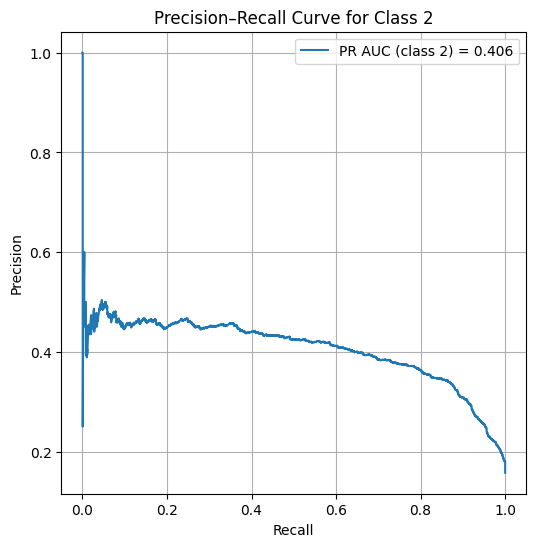

Best Threshold for class 2: 0.169
Best F1-score: 0.504


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score, f1_score
import xgboost as xgb

# ✅ Best parameters from your tuning
xgb_model = xgb.XGBClassifier(
    learning_rate=0.14568258239424609,
    max_depth=6,
    subsample=0.7290186302174095,
    colsample_bytree=0.5876436160089679,
    reg_alpha=4.2192212447413855,
    reg_lambda=8.431802769532,
    n_estimators=264,
    use_label_encoder=False,
    eval_metric="mlogloss",
    random_state=42
)

# Train
xgb_model.fit(X_train, y_train)

# ----------------------------
# Pick a class for PR curve (e.g., minority class 2)
# ----------------------------
class_of_interest = 2
y_true_binary = (y_test == class_of_interest).astype(int)  # convert to binary: class_of_interest vs rest

# Probabilities for that class
y_proba = xgb_model.predict_proba(X_test)[:, class_of_interest]

# ----------------------------
# Precision–Recall curve
# ----------------------------
precision, recall, thresholds = precision_recall_curve(y_true_binary, y_proba)
pr_auc = average_precision_score(y_true_binary, y_proba)

plt.figure(figsize=(6, 6))
plt.plot(recall, precision, label=f'PR AUC (class {class_of_interest}) = {pr_auc:.3f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision–Recall Curve for Class {class_of_interest}")
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# Find the best threshold (maximizing F1-score)
# ----------------------------
f1_scores = [f1_score(y_true_binary, (y_proba >= t).astype(int)) for t in thresholds]
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
print(f"Best Threshold for class {class_of_interest}: {best_threshold:.3f}")
print(f"Best F1-score: {f1_scores[best_idx]:.3f}")


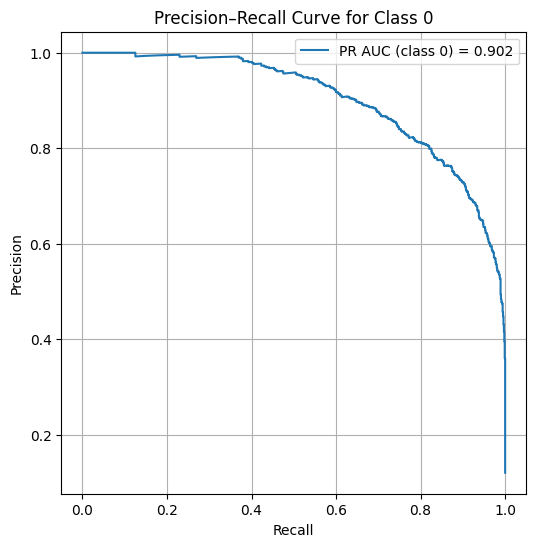

Best Threshold for class 0: 0.256
Best F1-score: 0.814


In [43]:
# ----------------------------
class_of_interest = 0
y_true_binary = (y_test == class_of_interest).astype(int)  # convert to binary: class_of_interest vs rest

# Probabilities for that class
y_proba = xgb_model.predict_proba(X_test)[:, class_of_interest]

# ----------------------------
# Precision–Recall curve
# ----------------------------
precision, recall, thresholds = precision_recall_curve(y_true_binary, y_proba)
pr_auc = average_precision_score(y_true_binary, y_proba)

plt.figure(figsize=(6, 6))
plt.plot(recall, precision, label=f'PR AUC (class {class_of_interest}) = {pr_auc:.3f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision–Recall Curve for Class {class_of_interest}")
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# Find the best threshold (maximizing F1-score)
# ----------------------------
f1_scores = [f1_score(y_true_binary, (y_proba >= t).astype(int)) for t in thresholds]
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
print(f"Best Threshold for class {class_of_interest}: {best_threshold:.3f}")
print(f"Best F1-score: {f1_scores[best_idx]:.3f}")


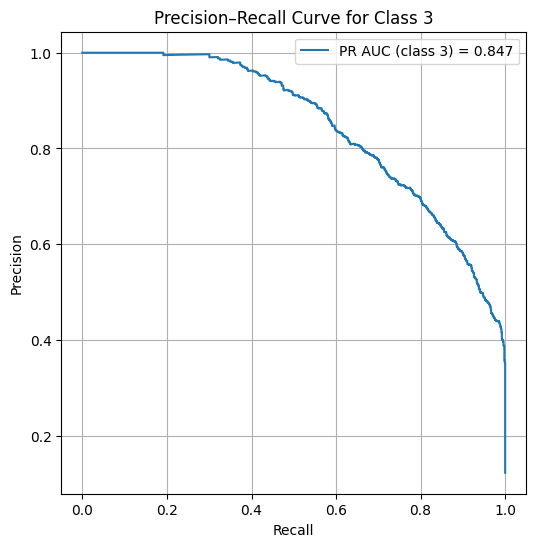

Best Threshold for class 3: 0.389
Best F1-score: 0.746


In [45]:
# ----------------------------
class_of_interest = 3
y_true_binary = (y_test == class_of_interest).astype(int)  # convert to binary: class_of_interest vs rest

# Probabilities for that class
y_proba = xgb_model.predict_proba(X_test)[:, class_of_interest]

# ----------------------------
# Precision–Recall curve
# ----------------------------
precision, recall, thresholds = precision_recall_curve(y_true_binary, y_proba)
pr_auc = average_precision_score(y_true_binary, y_proba)

plt.figure(figsize=(6, 6))
plt.plot(recall, precision, label=f'PR AUC (class {class_of_interest}) = {pr_auc:.3f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision–Recall Curve for Class {class_of_interest}")
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# Find the best threshold (maximizing F1-score)
# ----------------------------
f1_scores = [f1_score(y_true_binary, (y_proba >= t).astype(int)) for t in thresholds]
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
print(f"Best Threshold for class {class_of_interest}: {best_threshold:.3f}")
print(f"Best F1-score: {f1_scores[best_idx]:.3f}")


In [46]:
import numpy as np

# Your per-class thresholds
thresholds = {
    0: 0.256,
    1: 0.396,
    2: 0.169,
    3: 0.389
}

# Predicted probabilities
y_scores = xgb_model.predict_proba(X_test)

# Apply per-class thresholds
y_pred_custom = []
for probs in y_scores:
    # Apply thresholds mask
    passed = [i for i, p in enumerate(probs) if p >= thresholds[i]]
    if passed:
        # Pick the one with highest probability among those passing threshold
        chosen = max(passed, key=lambda i: probs[i])
    else:
        # Fallback to normal argmax if no threshold passed
        chosen = np.argmax(probs)
    y_pred_custom.append(chosen)

y_pred_custom = np.array(y_pred_custom)

from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report with Custom Thresholds:")
print(classification_report(y_test, y_pred_custom))
print("Confusion Matrix with Custom Thresholds:")
print(confusion_matrix(y_test, y_pred_custom))

Classification Report with Custom Thresholds:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1014
           1       0.83      0.91      0.87      5045
           2       0.46      0.31      0.37      1325
           3       0.73      0.74      0.74      1029

    accuracy                           0.78      8413
   macro avg       0.71      0.68      0.69      8413
weighted avg       0.76      0.78      0.76      8413

Confusion Matrix with Custom Thresholds:
[[ 777  237    0    0]
 [ 125 4601  266   53]
 [  32  667  405  221]
 [   0   69  202  758]]


In [ ]:
!pip install shap


Top 10 important features for Class 0:
                      feature  mean_abs_shap
3               Age_Oldest_TL       2.119992
37              num_std_12mts       1.117077
33      time_since_recent_enq       0.680675
9       recent_level_of_deliq       0.505858
17                    enq_L3m       0.376891
0               Age_Newest_TL       0.301595
1      pct_PL_enq_L6m_of_ever       0.270858
34  max_recent_level_of_deliq       0.206227
11                 Secured_TL       0.099672
8   time_since_recent_payment       0.086998

Top 10 important features for Class 1:
                      feature  mean_abs_shap
17                    enq_L3m       0.551209
3               Age_Oldest_TL       0.341602
9       recent_level_of_deliq       0.283487
37              num_std_12mts       0.169161
1      pct_PL_enq_L6m_of_ever       0.163606
33      time_since_recent_enq       0.156623
34  max_recent_level_of_deliq       0.083361
8   time_since_recent_payment       0.070671
0               Age_

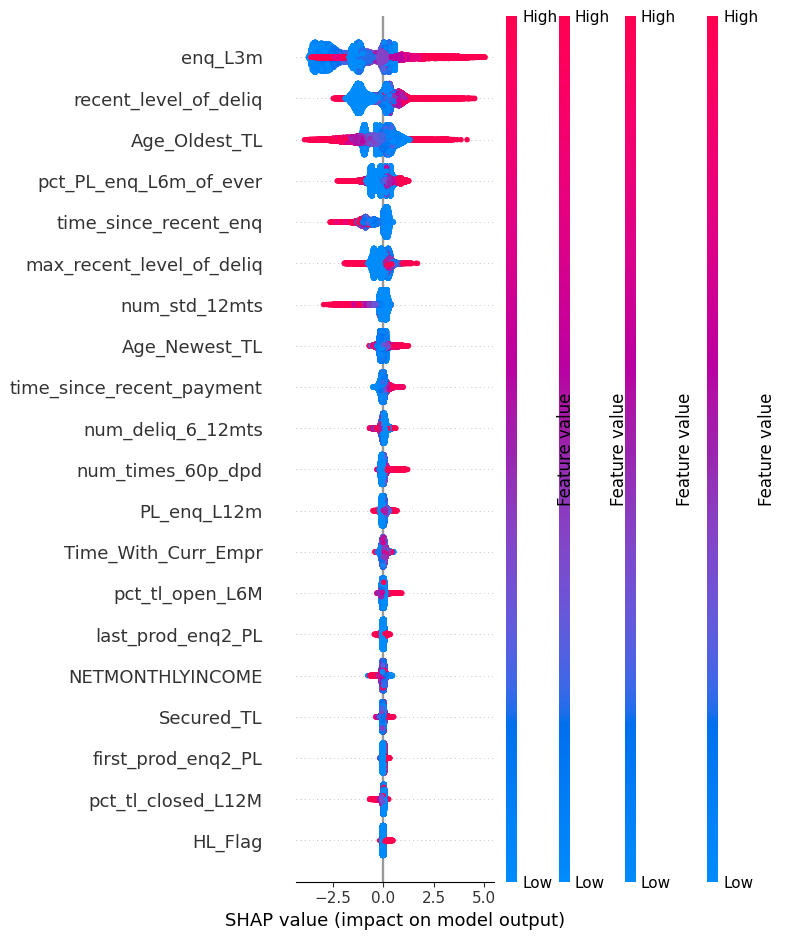

In [49]:
import xgboost as xgb
import shap
import pandas as pd
import numpy as np

# =========================
model= xgb_model
# =========================
# 2. Compute SHAP values
# =========================
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# =========================
# 3. Handle both list and array outputs
# =========================
if isinstance(shap_values, list):
    # Old SHAP version output
    for class_idx in range(len(shap_values)):
        print(f"\nTop 10 important features for Class {class_idx}:")
        shap_df = pd.DataFrame({
            "feature": X_train.columns,
            "mean_abs_shap": np.abs(shap_values[class_idx]).mean(axis=0)
        }).sort_values("mean_abs_shap", ascending=False).head(10)
        print(shap_df)
        shap.summary_plot(shap_values[class_idx], X_train, show=False)

elif isinstance(shap_values, np.ndarray) and shap_values.ndim == 3:
    # New SHAP version output: (n_samples, n_features, n_classes)
    n_classes = shap_values.shape[2]
    for class_idx in range(n_classes):
        class_shap = shap_values[:, :, class_idx]
        print(f"\nTop 10 important features for Class {class_idx}:")
        shap_df = pd.DataFrame({
            "feature": X_train.columns,
            "mean_abs_shap": np.abs(class_shap).mean(axis=0)
        }).sort_values("mean_abs_shap", ascending=False).head(10)
        print(shap_df)
        shap.summary_plot(class_shap, X_train, show=False)

else:
    raise ValueError(f"Unexpected SHAP output shape: {type(shap_values)}, shape={np.shape(shap_values)}")
